In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import copy

In [2]:
data=pd.read_csv('Superstore.csv',index_col="Order ID")


In [4]:
#parsing dates
data["Order Date"]=pd.to_datetime(data["Order Date"])
data["Ship Date"]=pd.to_datetime(data["Ship Date"])


### Insight 1:  Yearly Profit

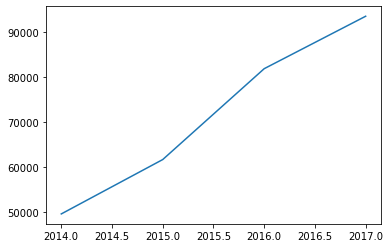

In [11]:
yearlyprofit = data.groupby(data["Order Date"].dt.year)["Profit"].sum()
plt.plot(yearlyprofit)
plt.show()

### Insight 2:  Monthly Profit of given year

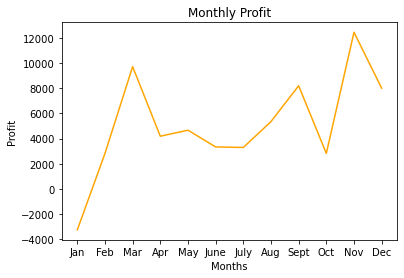

In [12]:
d2 = data.copy()
yearlyData = d2[d2["Order Date"].dt.year == 2015]
monthlyProfit = yearlyData.groupby(yearlyData["Order Date"].dt.month)["Profit"].sum()
months = ["Jan", "Feb", "Mar", "Apr", "May", "June", "July", "Aug", "Sept", "Oct", "Nov", "Dec"]
plt.plot(months,monthlyProfit,color="orange")
plt.xlabel('Months')
plt.ylabel('Profit')
plt.title("Monthly Profit")
plt.show()



### Insight 3 : Yearly SALES

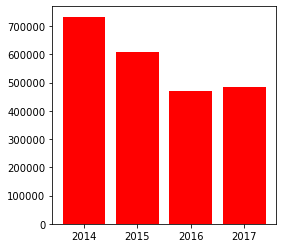

In [14]:
a=data["Order Date"].dt.year.value_counts().index
b=data.groupby(data["Order Date"].dt.year)["Sales"].sum()
#plt.bar(b,list(a))
plt.figure(figsize=(4,4))
plt.bar(a,b,color='r')
plt.show()

### Insight 4 : Top Sold Product

In [15]:
productSales = data.groupby(["Product ID","Product Name"])["Sales"].sum()
productSales= pd.DataFrame(productSales)
TopSoldProducts = productSales.sort_values(by=["Sales"],ascending=False).head()
TopSoldProducts

,,Sales
Product ID,Product Name,
TEC-CO-10004722,Canon imageCLASS 2200 Advanced Copier,61599.824
OFF-BI-10003527,Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind,27453.384
TEC-MA-10002412,Cisco TelePresence System EX90 Videoconferencing Unit,22638.480
FUR-CH-10002024,HON 5400 Series Task Chairs for Big and Tall,21870.576
OFF-BI-10001359,GBC DocuBind TL300 Electric Binding System,19823.479


### Insight 5 : Least sold product

In [16]:
LeastSold = productSales.sort_values(by=["Sales"],ascending=True).head()
LeastSold

,,Sales
Product ID,Product Name,
OFF-AP-10002203,Eureka Disposable Bags for Sanitaire Vibra Groomer I Upright Vac,1.624
OFF-LA-10003388,Avery 5,5.760
OFF-PA-10000048,Xerox 20,6.480
OFF-EN-10001535,Grip Seal Envelopes,7.072
OFF-AR-10003986,Avery Hi-Liter Pen Style Six-Color Fluorescent Set,7.700


### Insight 6 : Sales per State

In [17]:
#sales per state
data.groupby("State")["Sales"].sum()

State
Alabama                  19510.6400
Arizona                  35282.0010
Arkansas                 11678.1300
California              457687.6315
Colorado                 32108.1180
Connecticut              13384.3570
Delaware                 27451.0690
District of Columbia      2865.0200
Florida                  89473.7080
Georgia                  49095.8400
Idaho                     4382.4860
Illinois                 80166.1010
Indiana                  53555.3600
Iowa                      4579.7600
Kansas                    2914.3100
Kentucky                 36591.7500
Louisiana                 9217.0300
Maine                     1270.5300
Maryland                 23705.5230
Massachusetts            28634.4340
Michigan                 76269.6140
Minnesota                29863.1500
Mississippi              10771.3400
Missouri                 22205.1500
Montana                   5589.3520
Nebraska                  7464.9300
Nevada                   16729.1020
New Hampshire         

In [18]:
#percentage of profit with over all sale

(data["Profit"].sum()/data["Sales"].sum())*100


12.467217240315604